In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
#predicitng city cycle fuel consumption in miles per gallon

In [3]:
data=pd.read_fwf("D:\\24 - Machine_Learning\\download files\\auto-mpg.data")

In [4]:
data

,18.0,8,307.0,130.0,3504.,12.0,70,1,"""chevrolet chevelle malibu"""
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,"""ford galaxie 500"""
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
394,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
395,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""


In [5]:
col_names=['mpg','cylinders','displacement','horsepower','weight','acceleration','modelyear','origin','carname']

In [6]:
data.columns=col_names

In [7]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,"""ford galaxie 500"""
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
394,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
395,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""


In [8]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,"""ford galaxie 500"""


In [9]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,modelyear,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.528463,5.448363,193.139798,2969.080605,15.577078,76.025189,1.574307
std,7.820926,1.698329,104.244898,847.485218,2.755326,3.689922,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.900000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    float64
 5   acceleration  397 non-null    float64
 6   modelyear     397 non-null    int64  
 7   origin        397 non-null    int64  
 8   carname       397 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB


In [11]:
data.shape

(397, 9)

In [12]:
data.isnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
392,False,False,False,False,False,False,False,False,False
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False


In [13]:
data['carname'].value_counts()

"ford pinto"             6
"amc matador"            5
"toyota corolla"         5
"ford maverick"          5
"amc hornet"             4
                        ..
"chevrolet monza 2+2"    1
"ford mustang ii"        1
"pontiac astro"          1
"amc pacer"              1
"chevy s-10"             1
Name: carname, Length: 305, dtype: int64

In [14]:
type(data)

pandas.core.frame.DataFrame

<AxesSubplot:>

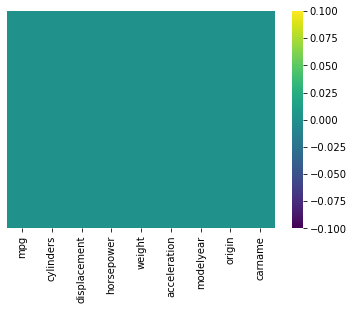

In [15]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

<AxesSubplot:xlabel='origin', ylabel='count'>

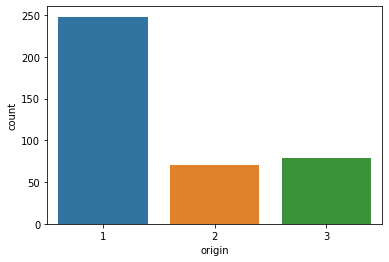

In [16]:
sns.countplot(x='origin',data=data)

In [17]:
data['carname'].unique()

array(['"buick skylark 320"', '"plymouth satellite"', '"amc rebel sst"',
       '"ford torino"', '"ford galaxie 500"', '"chevrolet impala"',
       '"plymouth fury iii"', '"pontiac catalina"',
       '"amc ambassador dpl"', '"dodge challenger se"',
       '"plymouth \'cuda 340"', '"chevrolet monte carlo"',
       '"buick estate wagon (sw)"', '"toyota corona mark ii"',
       '"plymouth duster"', '"amc hornet"', '"ford maverick"',
       '"datsun pl510"', '"volkswagen 1131 deluxe sedan"',
       '"peugeot 504"', '"audi 100 ls"', '"saab 99e"', '"bmw 2002"',
       '"amc gremlin"', '"ford f250"', '"chevy c20"', '"dodge d200"',
       '"hi 1200d"', '"chevrolet vega 2300"', '"toyota corona"',
       '"ford pinto"', '"plymouth satellite custom"',
       '"chevrolet chevelle malibu"', '"ford torino 500"',
       '"amc matador"', '"pontiac catalina brougham"',
       '"dodge monaco (sw)"', '"ford country squire (sw)"',
       '"pontiac safari (sw)"', '"amc hornet sportabout (sw)"',
       '"ch

In [18]:
data['carname']=[i[0] for i in data ['carname'].str.split(' ')]

In [19]:
data['carname'].unique()

array(['"buick', '"plymouth', '"amc', '"ford', '"chevrolet', '"pontiac',
       '"dodge', '"toyota', '"datsun', '"volkswagen', '"peugeot', '"audi',
       '"saab', '"bmw', '"chevy', '"hi', '"mercury', '"opel', '"fiat',
       '"oldsmobile', '"chrysler', '"mazda', '"volvo', '"renault',
       '"toyouta', '"maxda', '"honda', '"subaru"', '"chevroelt', '"capri',
       '"vw', '"mercedes-benz', '"cadillac', '"subaru', '"mercedes',
       '"vokswagen', '"triumph', '"nissan'], dtype=object)

In [20]:
data['carname']=data['carname'].replace(['chevrolet','chevy','chevrolet'],'chevrolet')
data['carname']=data['carname'].replace(['volkswagen','vw','vokswagen'],'volkswagen')
data['carname']=data['carname'].replace('maxda','mazda')
data['carname']=data['carname'].replace('toyouta','toyota')
data['carname']=data['carname'].replace('mercedes','mercedes-benz')
data['carname']=data['carname'].replace('nissan','datsun')
data['carname']=data['carname'].replace('capri','ford')

In [21]:
data['carname'].unique()

array(['"buick', '"plymouth', '"amc', '"ford', '"chevrolet', '"pontiac',
       '"dodge', '"toyota', '"datsun', '"volkswagen', '"peugeot', '"audi',
       '"saab', '"bmw', '"chevy', '"hi', '"mercury', '"opel', '"fiat',
       '"oldsmobile', '"chrysler', '"mazda', '"volvo', '"renault',
       '"toyouta', '"maxda', '"honda', '"subaru"', '"chevroelt', '"capri',
       '"vw', '"mercedes-benz', '"cadillac', '"subaru', '"mercedes',
       '"vokswagen', '"triumph', '"nissan'], dtype=object)

In [22]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick"
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth"
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc"
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford"
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,"""ford"
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford"
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw"
394,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge"
395,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford"


In [23]:
org=pd.get_dummies(data.origin,prefix='org')

In [24]:
org

,org_1,org_2,org_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
392,1,0,0
393,0,1,0
394,1,0,0
395,1,0,0


<AxesSubplot:xlabel='cylinders', ylabel='count'>

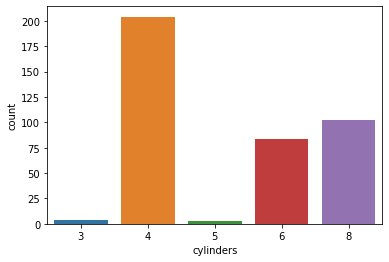

In [25]:
sns.countplot(x='cylinders',data=data)

In [26]:
cyl=pd.get_dummies(data.cylinders,prefix='cyl')

In [27]:
cyl

,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
392,0,1,0,0,0
393,0,1,0,0,0
394,0,1,0,0,0
395,0,1,0,0,0


<AxesSubplot:xlabel='modelyear', ylabel='count'>

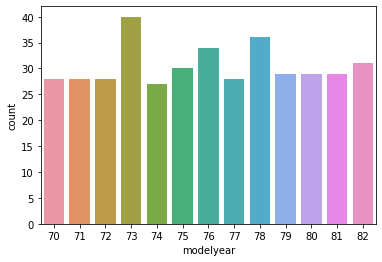

In [28]:
sns.countplot(x='modelyear',data=data)

In [29]:
year=pd.get_dummies(data.modelyear,prefix='year')

In [30]:
year

,year_70,year_71,year_72,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,0,0,0,0,0,0,0,0,0,0,0,0,1
393,0,0,0,0,0,0,0,0,0,0,0,0,1
394,0,0,0,0,0,0,0,0,0,0,0,0,1
395,0,0,0,0,0,0,0,0,0,0,0,0,1


In [31]:
cn=pd.get_dummies(data.carname,prefix='')

In [32]:
cn

,"_""amc","_""audi","_""bmw","_""buick","_""cadillac","_""capri","_""chevroelt","_""chevrolet","_""chevy","_""chrysler",...,"_""saab","_""subaru","_""subaru""","_""toyota","_""toyouta","_""triumph","_""vokswagen","_""volkswagen","_""volvo","_""vw"
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
data.drop(['origin','cylinders','modelyear','carname'],axis=1,inplace=True)

In [34]:
data

,mpg,displacement,horsepower,weight,acceleration
0,15.0,350.0,165.0,3693.0,11.5
1,18.0,318.0,150.0,3436.0,11.0
2,16.0,304.0,150.0,3433.0,12.0
3,17.0,302.0,140.0,3449.0,10.5
4,15.0,429.0,198.0,4341.0,10.0
...,...,...,...,...,...
392,27.0,140.0,86.00,2790.0,15.6
393,44.0,97.0,52.00,2130.0,24.6
394,32.0,135.0,84.00,2295.0,11.6
395,28.0,120.0,79.00,2625.0,18.6


In [35]:
data=pd.concat([org,data,cyl,year,cn],axis=1)

In [36]:
data.shape

(397, 64)

In [43]:
data[['displacement','horsepower','weight','acceleration']]=StandardScaler().fit_transform(data[['displacement','horsepower','weight','acceleration']])

In [38]:
sum(data.acceleration=='?')

0

In [39]:
sum(data.displacement=='?')

0

In [40]:
sum(data.horsepower=='?')

6

In [41]:
data=data[data.horsepower!='?']

In [42]:
data

,org_1,org_2,org_3,mpg,displacement,horsepower,weight,acceleration,cyl_3,cyl_4,...,"_""saab","_""subaru","_""subaru""","_""toyota","_""toyouta","_""triumph","_""vokswagen","_""volkswagen","_""volvo","_""vw"
0,1,0,0,15.0,350.0,165.0,3693.0,11.5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,18.0,318.0,150.0,3436.0,11.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,16.0,304.0,150.0,3433.0,12.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,17.0,302.0,140.0,3449.0,10.5,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,15.0,429.0,198.0,4341.0,10.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,1,0,0,27.0,140.0,86.00,2790.0,15.6,0,1,...,0,0,0,0,0,0,0,0,0,0
393,0,1,0,44.0,97.0,52.00,2130.0,24.6,0,1,...,0,0,0,0,0,0,0,0,0,1
394,1,0,0,32.0,135.0,84.00,2295.0,11.6,0,1,...,0,0,0,0,0,0,0,0,0,0
395,1,0,0,28.0,120.0,79.00,2625.0,18.6,0,1,...,0,0,0,0,0,0,0,0,0,0


In [44]:
Y=data.pop('mpg')

In [45]:
Y

0      15.0
1      18.0
2      16.0
3      17.0
4      15.0
       ... 
392    27.0
393    44.0
394    32.0
395    28.0
396    31.0
Name: mpg, Length: 391, dtype: float64

In [46]:
X=data

In [47]:
X.head(296)

,org_1,org_2,org_3,displacement,horsepower,weight,acceleration,cyl_3,cyl_4,cyl_5,...,"_""saab","_""subaru","_""subaru""","_""toyota","_""toyouta","_""triumph","_""vokswagen","_""volkswagen","_""volvo","_""vw"
0,1,0,0,1.491799,1.575170,0.844259,-1.471246,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1.185545,1.185250,0.541544,-1.652864,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1.051559,1.185250,0.538010,-1.289628,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1.032419,0.925303,0.556856,-1.834482,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,2.247862,2.432994,1.607524,-2.016100,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,0,0,1,-1.034793,-1.024296,-1.179336,-0.127272,0,1,0,...,0,0,0,0,0,0,0,0,0,0
294,1,0,0,-0.919948,-0.634376,-1.250009,-0.417861,0,1,0,...,0,0,0,0,0,0,0,0,0,0
295,1,0,0,-0.699828,-0.634376,-0.360711,-0.199919,0,1,0,...,0,0,0,0,0,0,0,0,0,0
296,0,1,0,-0.106462,-0.712360,0.652264,1.652585,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

In [49]:
X_train.shape

(312, 63)

In [50]:
X_test.shape

(79, 63)

In [51]:
LR=LinearRegression()

In [52]:
LR.fit(X_train,Y_train)

LinearRegression()

In [53]:
y_pred=LR.predict(X_test)

In [54]:
Y_test

277    31.5
387    26.0
280    19.8
336    32.4
305    28.8
       ... 
205    26.5
0      15.0
142    26.0
260    18.1
346    37.0
Name: mpg, Length: 79, dtype: float64

In [55]:
y_pred

array([30.60742188, 30.35400391, 23.12939453, 37.35839844, 22.96582031,
       25.75683594, 17.08544922, 29.4296875 , 18.11816406, 30.71875   ,
       29.67382812, 14.33886719, 27.99951172, 25.27392578, 14.10009766,
       11.81445312, 22.57714844, 13.91601562, 10.68066406, 33.55566406,
       28.95410156, 10.86083984, 22.81982422, 24.90332031, 18.46972656,
       22.77832031, 12.43164062, 33.56445312, 29.95263672, 24.47412109,
       30.31738281, 27.64306641, 31.74755859, 24.39746094, 36.11328125,
       30.79101562, 19.83056641, 20.1171875 , 21.32373047, 29.12353516,
       15.04248047, 12.77197266, 18.62939453, 18.08105469, 29.37939453,
       19.7265625 , 12.98876953,  8.75      , 37.44921875, 30.88183594,
       19.13378906, 25.53027344, 24.00341797, 29.28125   , 25.71289062,
       24.56445312, 34.38574219,  9.13378906, 18.44189453, 20.02050781,
       13.296875  , 21.70361328, 24.28857422, 15.4921875 , 30.88964844,
       20.30957031, 13.93603516, 36.21484375, 19.76074219, 17.19

In [56]:
df=pd.DataFrame({'Actual': Y_test,'Predicted': y_pred})
df

,Actual,Predicted
277,31.5,30.607422
387,26.0,30.354004
280,19.8,23.129395
336,32.4,37.358398
305,28.8,22.965820
...,...,...
205,26.5,23.414551
0,15.0,17.429688
142,26.0,24.414062
260,18.1,18.134277


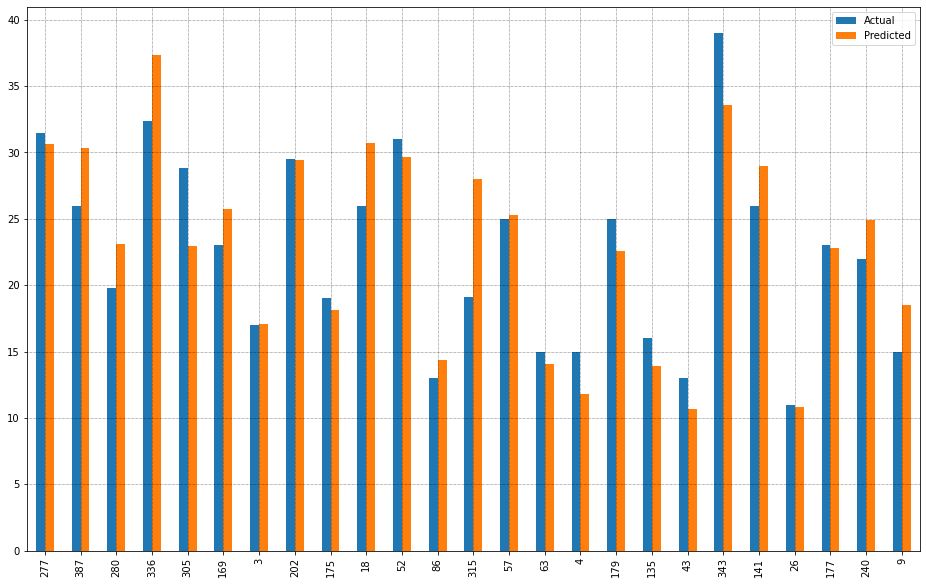

In [57]:
df1=df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='major',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [58]:
print('Mean Absolute Error:',mean_absolute_error(Y_test,y_pred))
print('Mean Squared Error:',mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test,y_pred)))

Mean Absolute Error: 2.3976241099683544
Mean Squared Error: 9.267210604993602
Root Mean Squared Error: 3.0442093563015016
